<a href="https://colab.research.google.com/github/pankaj18/forecasting/blob/main/deepar/multiple_time_series_deepar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install --upgrade mxnet-cu101~=1.7
#!pip install gluonts

     |████████████████████████████████| 356.7 MB 27 kB/s 


Download and unzip the data

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip

--2021-08-02 09:50:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261335609 (249M) [application/x-httpd-php]
Saving to: ‘LD2011_2014.txt.zip’

LD2011_2014.txt.zip 100%[===================>] 249.23M  42.1MB/s    in 6.2s    

2021-08-02 09:50:36 (40.5 MB/s) - ‘LD2011_2014.txt.zip’ saved [261335609/261335609]



In [5]:
!unzip LD2011_2014.txt.zip

Archive:  LD2011_2014.txt.zip
  inflating: LD2011_2014.txt         
   creating: __MACOSX/
  inflating: __MACOSX/._LD2011_2014.txt  


In [1]:
!head LD2011_2014.txt

"";"MT_001";"MT_002";"MT_003";"MT_004";"MT_005";"MT_006";"MT_007";"MT_008";"MT_009";"MT_010";"MT_011";"MT_012";"MT_013";"MT_014";"MT_015";"MT_016";"MT_017";"MT_018";"MT_019";"MT_020";"MT_021";"MT_022";"MT_023";"MT_024";"MT_025";"MT_026";"MT_027";"MT_028";"MT_029";"MT_030";"MT_031";"MT_032";"MT_033";"MT_034";"MT_035";"MT_036";"MT_037";"MT_038";"MT_039";"MT_040";"MT_041";"MT_042";"MT_043";"MT_044";"MT_045";"MT_046";"MT_047";"MT_048";"MT_049";"MT_050";"MT_051";"MT_052";"MT_053";"MT_054";"MT_055";"MT_056";"MT_057";"MT_058";"MT_059";"MT_060";"MT_061";"MT_062";"MT_063";"MT_064";"MT_065";"MT_066";"MT_067";"MT_068";"MT_069";"MT_070";"MT_071";"MT_072";"MT_073";"MT_074";"MT_075";"MT_076";"MT_077";"MT_078";"MT_079";"MT_080";"MT_081";"MT_082";"MT_083";"MT_084";"MT_085";"MT_086";"MT_087";"MT_088";"MT_089";"MT_090";"MT_091";"MT_092";"MT_093";"MT_094";"MT_095";"MT_096";"MT_097";"MT_098";"MT_099";"MT_100";"MT_101";"MT_102";"MT_103";"MT_104";"MT_105";"MT_106";"MT_107";"MT_108";"MT_109";"MT_110";"MT_111

Import relevant librararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [3]:
df=pd.read_csv('LD2011_2014.txt',sep=';',parse_dates=True,index_col=0,decimal=',')

In [4]:
def understand_df(df):
  print(f"shape of df is:{df.shape}")
  print(df.head())
  print('categorical columns')
  print(df.select_dtypes(include="object").columns)
  print('numerical columns')
  print(df.select_dtypes(exclude="object").columns)
  print('Check Missing values in dataset')
  print(df.isnull().sum())

In [5]:
understand_df(df)

shape of df is:(140256, 370)
                     MT_001  MT_002  MT_003  ...  MT_368  MT_369  MT_370
2011-01-01 00:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0
2011-01-01 00:30:00     0.0     0.0     0.0  ...     0.0     0.0     0.0
2011-01-01 00:45:00     0.0     0.0     0.0  ...     0.0     0.0     0.0
2011-01-01 01:00:00     0.0     0.0     0.0  ...     0.0     0.0     0.0
2011-01-01 01:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0

[5 rows x 370 columns]
categorical columns
Index([], dtype='object')
numerical columns
Index(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007',
       'MT_008', 'MT_009', 'MT_010',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', length=370)
Check Missing values in dataset
MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length:

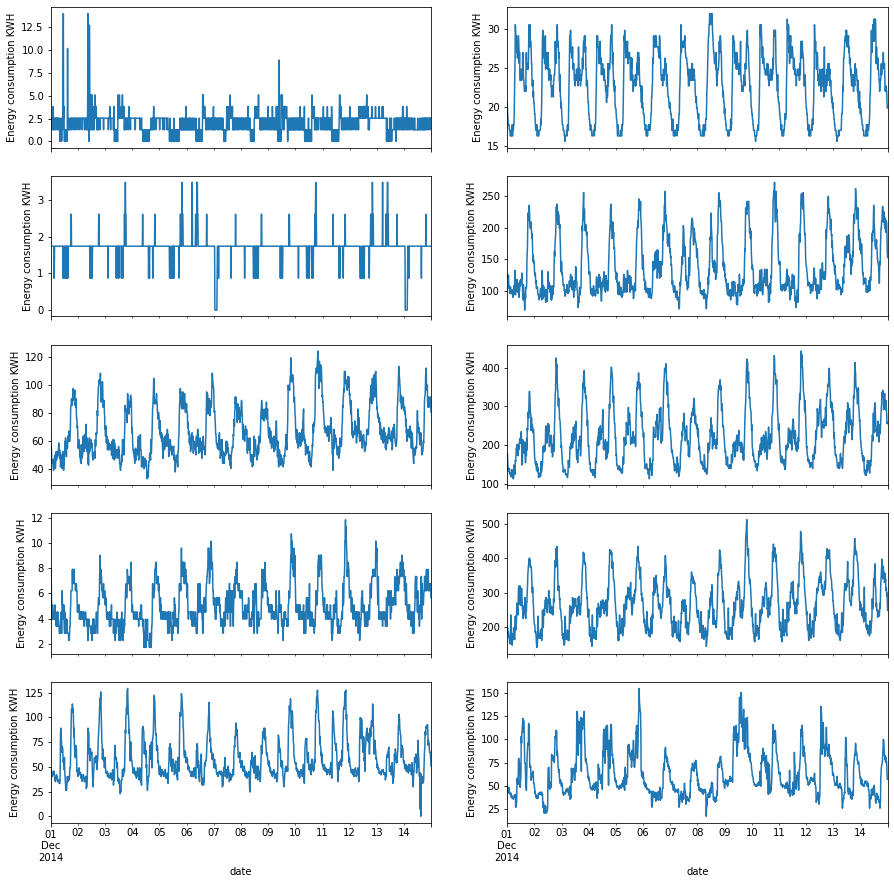

In [6]:
fig,axs=plt.subplots(nrows=5,ncols=2,sharex=True,figsize=(15,15))
axs=axs.ravel()
for i in range(10):
  df[df.columns[i]].loc["2014-12-01":"2014-12-14"].plot(ax=axs[i])
  axs[i].set_xlabel("date")
  axs[i].set_ylabel('Energy consumption KWH')

In [7]:
df_input=df.reset_index(drop=True).T.reset_index()

In [8]:
df_input.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,140216,140217,140218,140219,140220,140221,140222,140223,140224,140225,140226,140227,140228,140229,140230,140231,140232,140233,140234,140235,140236,140237,140238,140239,140240,140241,140242,140243,140244,140245,140246,140247,140248,140249,140250,140251,140252,140253,140254,140255
0,MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.269036,1.269036,1.269036,2.538071,3.807107,6.345178,2.538071,2.538071,2.538071,3.807107,2.538071,2.538071,2.538071,1.269036,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071,3.807107,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
1,MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.027027,25.604552,27.027027,26.315789,29.160740,29.160740,29.871977,29.160740,29.160740,28.449502,28.449502,29.871977,29.160740,26.315789,27.738265,27.738265,29.160740,28.449502,29.160740,29.160740,28.449502,28.449502,27.027027,26.315789,25.604552,25.604552,23.470839,22.759602,23.470839,22.759602,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
2,MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737619,0.868810,1.737619,1.737619,1.737619,1.737619,0.868810,1.737619,1.737619,1.737619,1.737619,1.737619,2.606429,1.737619,2.606429,3.475239,2.606429,2.606429,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
3,MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.113821,128.048780,146.341463,144.308943,146.341463,144.308943,126.016260,140.243902,152.439024,162.601626,162.601626,164.634146,152.439024,160.569106,189.024390,205.284553,199.186992,205.284553,217.479675,215.447154,227.642276,205.284553,193.089431,195.121951,193.089431,189.024390,168.699187,162.601626,168.699187,160.569106,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
4,MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.170732,69.512195,57.317073,59.756098,60.975610,60.975610,62.195122,54.878049,63.414634,71.951220,75.609756,68.292683,63.414634,65.853659,74.390244,85.365854,87.804878,86.585366,89.024390,92.682927,102.439024,95.121951,91.463415,96.341463,91.463415,90.243902,90.243902,87.804878,87.804878,82.926829,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341


In [9]:
ts_code=df_input['index'].astype('category').cat.codes.values
#ts_code

In [10]:
df_train=df_input.iloc[:,1:134999].values
df_test=df_input.iloc[:,134999:].values

In [11]:
df_train.shape

(370, 134998)

In [12]:
df_test.shape

(370, 5258)

In [13]:
df.index[0]

Timestamp('2011-01-01 00:15:00')

In [14]:
df.index[134997]

Timestamp('2014-11-07 05:30:00')

In [15]:
freq='15min'
start_train=pd.Timestamp('2011-01-01 00:15:00',freq=freq)
start_test=pd.Timestamp('2014-11-07 05:30:00',freq=freq)

In [16]:
# predict for 6 days: 4*24*6 
prediction_length=672


In [17]:
import mxnet as mx

In [18]:
estimator=DeepAREstimator(
    freq=freq,
    prediction_length=672,
    context_length=672,
    use_feat_static_cat=True,
    cardinality=[1],
    num_layers=1,
    num_cells=32,
    cell_type='lstm',
    trainer=Trainer(epochs=5,batch_size=32,ctx=mx.context.gpu())
)

In [19]:
df_train[0:8].shape

(8, 134998)

In [20]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

In [21]:
train_ds=ListDataset(
    [
     {FieldName.START:start_train,
     FieldName.TARGET:target,
     FieldName.FEAT_STATIC_CAT:fsc
     } for (target,fsc) in zip(df_train[0:2],ts_code[0:2].reshape(-1,1))
    ],
    freq=freq
)

In [22]:
test_ds=ListDataset(
    [
     {FieldName.START:start_test,
     FieldName.TARGET:target,
     FieldName.FEAT_STATIC_CAT:fsc
     } for (target,fsc) in zip(df_test[0:2],ts_code[0:2].reshape(-1,1))
    ],
    freq=freq
)

In [23]:
next(iter(train_ds))

{'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source='list_data', row=0),
 'start': Timestamp('2011-01-01 00:15:00', freq='15T'),
 'target': array([0.       , 0.       , 0.       , ..., 2.5380712, 2.5380712,
        1.2690356], dtype=float32)}

In [24]:
predictor=estimator.train(training_data=train_ds)

100%|██████████| 50/50 [00:34<00:00,  1.46it/s, epoch=5/5, avg_epoch_loss=1.28]


In [25]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [34]:
forecast_it,ts_it=make_evaluation_predictions(test_ds,predictor,num_samples=100)

In [42]:
def plot_prob_forecast(ts_entry,forecast_entry):
  prediction_intervals=(80.0,95.0)
  legend=["observations","median_prediction"]+[f"{k}% prediction interval" for k in prediction_intervals ][::-1]
  plot_length=prediction_length
  fig,ax=plt.subplots(1,1,figsize=(10,6))
  ts_entry[-prediction_length:].plot(ax=ax)
  forecast_entry.plot(prediction_intervals=prediction_intervals,color='g')
  plt.grid(which='both')
  plt.legend(legend,loc="upper left")


In [36]:
from tqdm.autonotebook import tqdm

In [37]:
tss=list(tqdm(ts_it,total=len(df_test)))
forecasts=list(tqdm(forecast_it,total=len(df_test)))

In [44]:
len(tss)

2

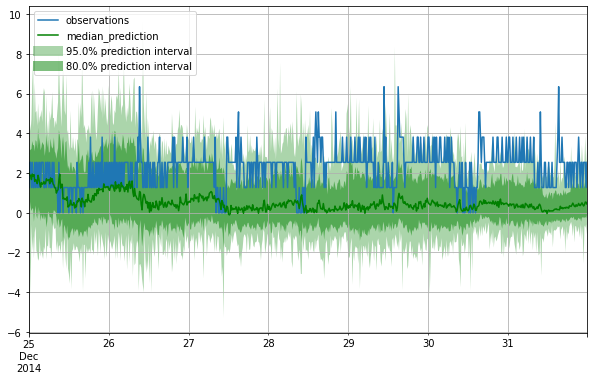

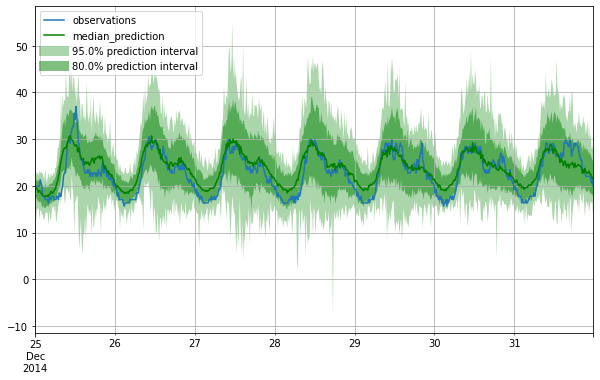

In [45]:
for i in tqdm(range(2)):
  ts_entry=tss[i]
  forecast_entry=forecasts[i]
  plot_prob_forecast(ts_entry,forecast_entry)

In [46]:
from gluonts.evaluation import Evaluator

In [47]:
evaluator=Evaluator(quantiles=[0.1,0.5,0.9])
agg_metrics,item_metrics=evaluator(iter(tss),iter(forecats),num_series=len(df[0:2]))





Running evaluation: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


In [48]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,3.874455,1200.235229,1513.959351,2.252916,0.931286,1.917848,0.741133,1.288145,11.934954,385.905847,0.000000,1200.235178,0.078869,821.959408,0.418155
1,NaN,6.088826,1336.167480,15320.056641,22.797703,1.305572,1.522968,0.095342,0.090361,14.328565,627.383330,0.188988,1336.167486,0.752976,829.488546,0.986607
